In [1]:
import numpy as np
import pandas as pd
import datetime
import ast
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_theme()
from importlib import reload
import torch

# Silencing warnings 
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

In [4]:
cognates={'AGR' :  ['Agricultural Inputs', 'Farm & Heavy Construction Machinery', 'Farm Products'],
          'AUT' :  ['Auto & Truck Dealerships', 'Auto Manufacturers', 'Auto Parts', 'Recreational Vehicles'],
          'BEV' :  ['Beverages - Brewers', 'Beverages - Non-Alcoholic', 'Beverages - Wineries & Distilleries'], 
          'CHM' :  ['Chemicals', 'Specialty Chemicals'], 
          'DEF' :  ['Aerospace & Defense'], #Here I deviate from Paul's choice to include `AER` here as well
          'EDU' :  ['Education & Training Services'],
          'ENG' :  ['Solar'], #`ENG` code does not cover oil and gas, although many oil and gas companies lobby this code.
          'FOO' :  ['Confectioners', 'Food Distribution', 'Packaged Foods'],
          'FUE' :  ['Oil & Gas Drilling', 'Oil & Gas E&P','Oil & Gas Equipment & Services', 'Oil & Gas Integrated', 'Oil & Gas Midstream', 'Oil & Gas Refining & Marketing'],
          'INS' :  ['Insurance - Diversified', 'Insurance - Life', 'Insurance - Property & Casualty', 'Insurance - Reinsurance', 'Insurance - Specialty', 'Insurance Brokers'],
          'MAN' :  ['Metal Fabrication', 'Specialty Industrial Machinery', 'Steel', 'Textile Manufacturing'], #I added to this one to match choices Paul made
          'NAT' :  ['Aluminum', 'Copper', 'Lumber & Wood Production', 'Other Industrial Metals & Mining', 'Other Precious Metals & Mining', 'Silver'],
          'PHA' :  ['Drug Manufacturers - General', 'Drug Manufacturers - Specialty & Generic', 'Pharmaceutical Retailers'],
          'RES' :  ['REIT - Diversified', 'REIT - Industrial', 'REIT - Mortgage', 'REIT - Office', 'REIT - Specialty', 'Real Estate - Development', 'Real Estate - Diversified', 'Real Estate Services'],
          'RRR' :  ['Railroads'],
          'TEC' :  ['Telecom Services'],
          'TOB' :  ['Tobacco'],
          'UTI' :  ['Utilities - Diversified', 'Utilities - Independent Power Producers', 'Utilities - Regulated Water', 'Utilities - Renewable'] }

In [2]:
import scripts.data_extraction
reload(scripts.data_extraction)
from scripts.data_extraction import stock_and_lobbying_totals

In [3]:
from darts import TimeSeries, concatenate
from darts.utils.callbacks import TFMProgressBar
from darts.models.forecasting.baselines import NaiveSeasonal #used in baseline model
from darts.models import (VARIMA, XGBModel, NBEATSModel)
VARIMA.min_train_series_length=15 #This removes the restriction that VARIMA needs 30 data points to fit.
from darts.metrics import (mae, #metrics for model performance
                           mse, 
                           mase, 
                           msse)
from darts.dataprocessing.transformers import Scaler #DARTS has a preprocessing function like sklearn's StandardScaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import logging

logging.disable(logging.CRITICAL)

def generate_torch_kwargs():
    # run torch models on CPU, and disable progress bars for all model stages except training.
    return {
        "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)],
        }
    }


## Test metrics

BAse

#### A place for nice plots and figures

In [22]:
from darts.utils.statistics import check_seasonality
from darts.utils.statistics import extract_trend_and_seasonality
from darts.utils.utils import ModelMode

Text(0, 0.5, 'Lobbying (USD)')

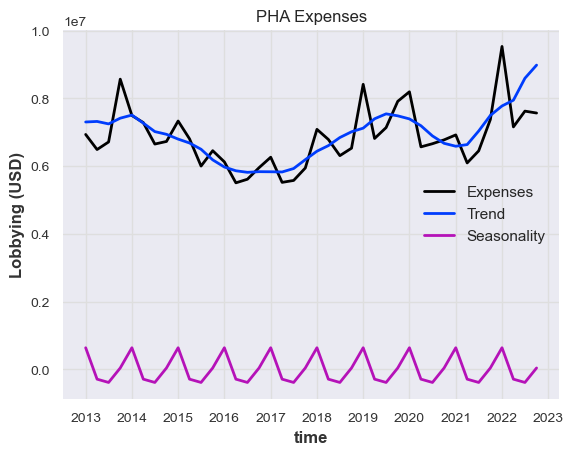

In [23]:
issue=stock_and_lobbying_totals('PHA', cognates['PHA'], adjust_for_num_codes=True)
expenses=TimeSeries.from_dataframe(issue)['lobbying_expenses']
trend, seasonality = extract_trend_and_seasonality(expenses, model=ModelMode.ADDITIVE, freq=4)
fig, axs =plt.subplots(1,1)
expenses.plot(label='Expenses', ax=axs)
trend.plot(label='Trend', ax=axs)
seasonality.plot(label='Seasonality', ax=axs)
axs.set_title('PHA Expenses')
axs.set_ylabel('Lobbying (USD)')

Text(0, 0.5, 'Lobbying (USD)')

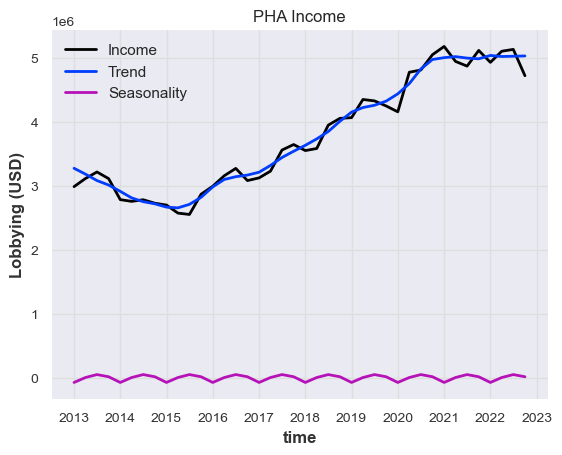

In [25]:
issue=stock_and_lobbying_totals('PHA', cognates['PHA'], adjust_for_num_codes=True)
income=TimeSeries.from_dataframe(issue)['lobbying_income']
trend, seasonality = extract_trend_and_seasonality(income, model=ModelMode.ADDITIVE, freq=4)
fig, axs =plt.subplots(1,1)
income.plot(label='Income', ax=axs)
trend.plot(label='Trend', ax=axs)
seasonality.plot(label='Seasonality', ax=axs)
axs.set_title('PHA Income')
axs.set_ylabel('Lobbying (USD)')